In [ ]:
import os
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Get S&P500 data
df1 = pd.read_excel("\Data_Month\SP500_9.xlsx")
df1.head()


,Date,Close,Open,high,low
0,2025-02-28,5667.44,5974.38,5986.38,5504.48
1,2025-01-31,5954.50,5969.65,6147.43,5837.66
2,2024-12-31,6040.53,5903.26,6128.18,5773.31
3,2024-11-30,5881.63,6040.11,6099.97,5832.30
4,2024-10-31,6032.38,5723.22,6044.17,5696.51


In [36]:
# Sort values based on Date
df1.sort_values(by='Date',inplace=True)
df1.head()


,Date,Close,Open,high,low
121,2015-01-01,2058.90,2072.36,1988.12,1994.99
120,2015-02-01,1996.67,2119.59,1980.90,2104.50
119,2015-03-01,2105.23,2117.52,2039.69,2067.89
118,2015-04-01,2067.63,2125.92,2048.38,2085.51
117,2015-05-01,2087.38,2134.72,2067.93,2107.39


In [37]:
#Convert date column
df1['Date'] = pd.to_datetime(df1['Date'])
df1.dtypes

,0
Date,datetime64[ns]
Close,float64
Open,float64
high,float64
low,float64


# Data Processing

In [32]:
new_df=df1.copy()

In [33]:
new_df['Date'] = pd.to_datetime(new_df['Date'], format='%b-%y')
# Extract month and year components
new_df['Month'] = new_df['Date'].dt.month
new_df['Year'] = new_df['Date'].dt.year


In [ ]:
# Separate yearwise data to understand trend
sp500_data_2015_2016 = new_df[(new_df['Month'] >= 3) & (new_df['Year'] == 2015) | (new_df['Month'] < 3) & (new_df['Year'] == 2016) ]
sp500_data_2016_2017 = new_df[(new_df['Month'] >= 3) & (new_df['Year'] == 2016) | (new_df['Month'] < 3) & (new_df['Year'] == 2017) ]
sp500_data_2017_2018 = new_df[(new_df['Month'] >= 3) & (new_df['Year'] == 2017) | (new_df['Month'] < 3) & (new_df['Year'] == 2018) ]
sp500_data_2018_2019 = new_df[(new_df['Month'] >= 3) & (new_df['Year'] == 2018) | (new_df['Month'] < 3) & (new_df['Year'] == 2019) ]
sp500_data_2019_2020 = new_df[(new_df['Month'] >= 3) & (new_df['Year'] == 2019) | (new_df['Month'] < 3) & (new_df['Year'] == 2020) ]

sp500_data_2020_2021 = new_df[(new_df['Month'] >= 3) & (new_df['Year'] == 2020) | (new_df['Month'] < 3) & (new_df['Year'] == 2021) ]
sp500_data_2021_2022 = new_df[(new_df['Month'] >= 3) & (new_df['Year'] == 2021) | (new_df['Month'] < 3) & (new_df['Year'] == 2022) ]
sp500_data_2022_2023 = new_df[(new_df['Month'] >= 3) & (new_df['Year'] == 2022) | (new_df['Month'] < 3) & (new_df['Year'] == 2023) ]
sp500_data_2023_2024 = new_df[(new_df['Month'] >= 3) & (new_df['Year'] == 2023) | (new_df['Month'] < 3) & (new_df['Year'] == 2024) ]
sp500_data_2024_2025 = new_df[(new_df['Month'] >= 3) & (new_df['Year'] == 2024) | (new_df['Month'] < 3) & (new_df['Year'] == 2025) ]

<ipython-input-12-bfb9af57af85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500_data_2022_2023['Month'] = sp500_data_2022_2023['Date'].dt.strftime('%b')
<ipython-input-12-bfb9af57af85>:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sp500_data_2022_2023['Month'])


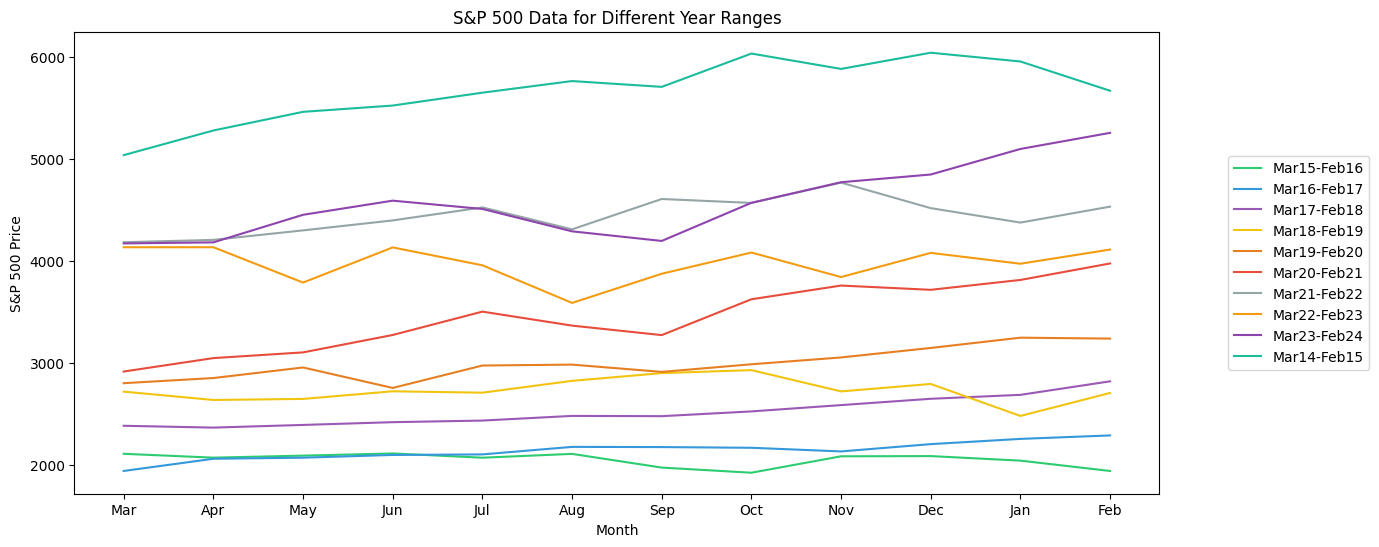

In [ ]:
# Plot Line chart
sp500_data_2022_2023['Month'] = sp500_data_2022_2023['Date'].dt.strftime('%b')
fig, ax = plt.subplots(figsize=(14, 6))

# Define the  colors
colors = ['#1abc9c', '#2ecc71', '#3498db', '#9b59b6', '#f1c40f', '#e67e22', '#e74c3c',  '#95a5a6', '#f39c12','#8e44ad' ]

# Plot S&P 500 data for March 2016
ax.plot(sp500_data_2022_2023['Month'], sp500_data_2015_2016['Close'], label='Mar15-Feb16', color=colors[1])

# Plot S&P 500 data for March 2017
ax.plot(sp500_data_2022_2023['Month'], sp500_data_2016_2017['Close'], label='Mar16-Feb17', color=colors[2])

# Plot S&P 500 data for March 2018
ax.plot(sp500_data_2022_2023['Month'], sp500_data_2017_2018['Close'], label='Mar17-Feb18', color=colors[3])

# Plot S&P 500 data for March 2019
ax.plot(sp500_data_2022_2023['Month'], sp500_data_2018_2019['Close'], label='Mar18-Feb19', color=colors[4])

# Plot S&P 500 data for March 2020
ax.plot(sp500_data_2022_2023['Month'], sp500_data_2019_2020['Close'], label='Mar19-Feb20', color=colors[5])

# Plot S&P 500 data for March 2022
ax.plot(sp500_data_2022_2023['Month'], sp500_data_2020_2021['Close'], label='Mar20-Feb21', color=colors[6])
# Plot S&P 500 data for March 2021
ax.plot(sp500_data_2022_2023['Month'], sp500_data_2021_2022['Close'], label='Mar21-Feb22', color=colors[7])
# Plot S&P 500 data for March 2022
ax.plot(sp500_data_2022_2023['Month'], sp500_data_2022_2023['Close'], label='Mar22-Feb23', color=colors[8])

# Plot S&P 500 data for March 2023
ax.plot(sp500_data_2022_2023['Month'], sp500_data_2023_2024['Close'], label='Mar23-Feb24', color=colors[9])

ax.plot(sp500_data_2022_2023['Month'], sp500_data_2024_2025['Close'], label='Mar14-Feb15', color= colors[0])

# Customize the plot
#ax.set_xticks(sp500_data_2022_2023['Date'])
ax.set_xticklabels(sp500_data_2022_2023['Month'])
ax.set_xlabel('Month')

ax.set_ylabel('S&P 500 Price')
plt.title('S&P 500 Data for Different Year Ranges')
plt.legend(loc='center right', bbox_to_anchor=(1.2, 0.5))
plt.show()

# Data Processing

In [38]:
## Create a new DataFrame with values for the dates

df_sp500 = df1.groupby(pd.Grouper(key='Date', freq='ME')).tail(1)
print(df_sp500.head())

          Date    Close     Open     high      low
121 2015-01-01  2058.90  2072.36  1988.12  1994.99
120 2015-02-01  1996.67  2119.59  1980.90  2104.50
119 2015-03-01  2105.23  2117.52  2039.69  2067.89
118 2015-04-01  2067.63  2125.92  2048.38  2085.51
117 2015-05-01  2087.38  2134.72  2067.93  2107.39


In [43]:
# Change to Month-year format

df_sp500['Date'] = df_sp500['Date'].dt.strftime('%b-%y')
stock_data=df_sp500.copy()

In [44]:
print(stock_data.head())


       Date    Close     Open     high      low
121  Jan-15  2058.90  2072.36  1988.12  1994.99
120  Feb-15  1996.67  2119.59  1980.90  2104.50
119  Mar-15  2105.23  2117.52  2039.69  2067.89
118  Apr-15  2067.63  2125.92  2048.38  2085.51
117  May-15  2087.38  2134.72  2067.93  2107.39


# Implementing ML model

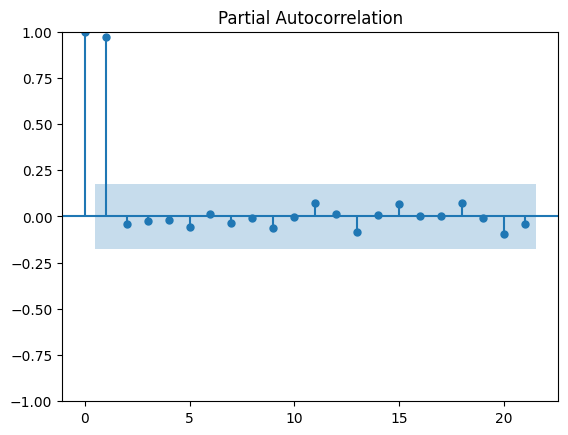

In [ ]:
plot_pacf(stock_data['Close'])
plt.show()

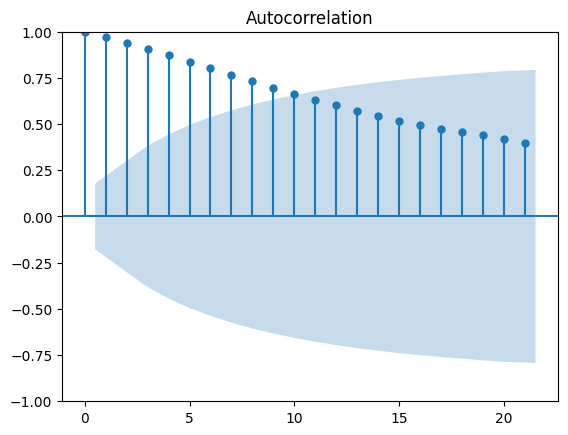

In [ ]:
plot_acf(stock_data['Close'])
plt.show()

Auto Correlation and Partial Autocorrelation data is shown for the data.Here, both plots have a horizontal axis that shows the lags, and a vertical axis representing correlation coefficients ranging from -1 to 1 where -1 means perfect negative correlation, 0 means no correlation and 1 means perfect positive correlation. If the data declines exponentially , it means the data is stationary.

The blue shaded area represents confidence interval for the correlation coefficients. If the correlation coefficient at all lag is within the confidence interval, it indication that the data is stationary and  model is capturing the underlying patterns in the data accurately.

Both the plots indicate that the data is stationary,SARIMA model can be applied.

In [ ]:
# Get separate columns for month and year
stock_data[['Month','Year']] = stock_data['Date'].str.split('-', expand=True)
stock_data.head()

,Date,Close,Open,high,low,Month,Year
121,Jan-15,2058.90,2072.36,1988.12,1994.99,Jan,15
120,Feb-15,1996.67,2119.59,1980.90,2104.50,Feb,15
119,Mar-15,2105.23,2117.52,2039.69,2067.89,Mar,15
118,Apr-15,2067.63,2125.92,2048.38,2085.51,Apr,15
117,May-15,2087.38,2134.72,2067.93,2107.39,May,15


In [ ]:
# Define features and target variables
#X_train = stock_data[[ 'Date', 'Open_sp500', 'High_sp500', 'Low_sp500', 'Close_sp500','Volume', 'Open_vix', 'High_vix', 'Low_vix', 'Close_vix','News Sentiment','Year'
X = stock_data[['Date', 'Close', 'Open', 'high', 'low', 'Year']]
y = stock_data['Month']

In [ ]:
label_encoder = LabelEncoder()
stock_data['Month'] = label_encoder.fit_transform(stock_data['Month'])


In [ ]:
#Define and encode y_train
X_train = stock_data[[ 'Date', 'Close', 'Open', 'high', 'low', 'Year']][:-18]  # Use data for training
y_train =   stock_data['Month'][:-18]
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

In [ ]:
#Define and encode y-test
X_test = stock_data[['Date', 'Close', 'Open', 'high', 'low',  'Year']][-18:]  # Use data for testing
y_test = stock_data['Month'][-18:]
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

In [ ]:
#Define & fit the model.  Make forecast predictions
model = SARIMAX(y_train_encoded, order=(1, 1, 1), seasonal_order=(1, 1, 1, 18))
model_fit = model.fit()
predictions = model_fit.forecast(steps=18)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


In [ ]:
#Calculate th r2 score
y_test_decoded=label_encoder.inverse_transform(y_test_encoded)
r2 = r2_score(y_test_encoded, predictions)
print('R2_score =',r2)

R2_score = 0.9999999995921552


In [ ]:
highest_performing_month_index = np.argmax(predictions)
highest_performing_month = y_test.iloc[highest_performing_month_index]
print("The highest performing month is: ", highest_performing_month)

The highest performing month is:  11


In [ ]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_encoded, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_encoded, predictions)

print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)
print("Mean Absolute Error (MAE): ", mae)

Mean Squared Error (MSE):  5.0867302981032264e-09
Root Mean Squared Error (RMSE):  7.132131727683685e-05
Mean Absolute Error (MAE):  5.4981634563633364e-05
